In [2]:
%run '../rootlib.ipynb'

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
chain = R.TChain( "tof" )

In [4]:
chain.Add( "/Users/danielbrandenburg/bnl/local/work/TofPicoDstMaker/bin/out/*.root" )

2

In [5]:
can = Canvas( width=1100, height=500 )
can.Divide( 2, 1 )

In [6]:
def tdcE( i ) :
    return "vpdBbqTdcEast[" + str(i) + "]"
def tdcW( i ) :
    return "vpdBbqTdcWest[" + str(i) + "]"
def safeE( l ) :
    safety = ""
    for i in l :
        safety += tdcE( i ) + " > 150 && "
    safety += "1"
    return safety

def safeW( l ) :
    safety = ""
    for i in l :
        safety += tdcW( i ) + " > 150 && "
    safety += "1"
    return safety
        
        


In [7]:
safeE( [4, 5, 6] )

'vpdBbqTdcEast[4] > 150 && vpdBbqTdcEast[5] > 150 && vpdBbqTdcEast[6] > 150 && 1'

In [8]:
can = Canvas( width=1100, height=2000 )
can.Divide( 1, 4 )
can.cd(1)
chain.Draw( tdcE(0) + ">>hTdcE0", safeE([0]), "h" )
mTdcE0 = int(R.gDirectory.Get( "hTdcE0" ).GetMean())
can.cd(2)
chain.Draw( tdcE(4) + ">>hTdcE4", safeE([4]), "h" )
mTdcE4 = int(R.gDirectory.Get( "hTdcE4" ).GetMean())
can.cd(3)
chain.Draw( tdcE(8) + ">>hTdcE8", safeE([8]), "h" )
mTdcE8 = int(R.gDirectory.Get( "hTdcE8" ).GetMean())
can.cd(4)
chain.Draw( tdcE(12) + ">>hTdcE12", safeE([12]), "h" )
mTdcE12 = int(R.gDirectory.Get( "hTdcE12" ).GetMean())
print "{ ", mTdcE0, ", ", mTdcE4, ", ", mTdcE8, ", ", mTdcE12, " }"

{  2082 ,  2385 ,  2350 ,  2082  }


## East Channel Pulsers

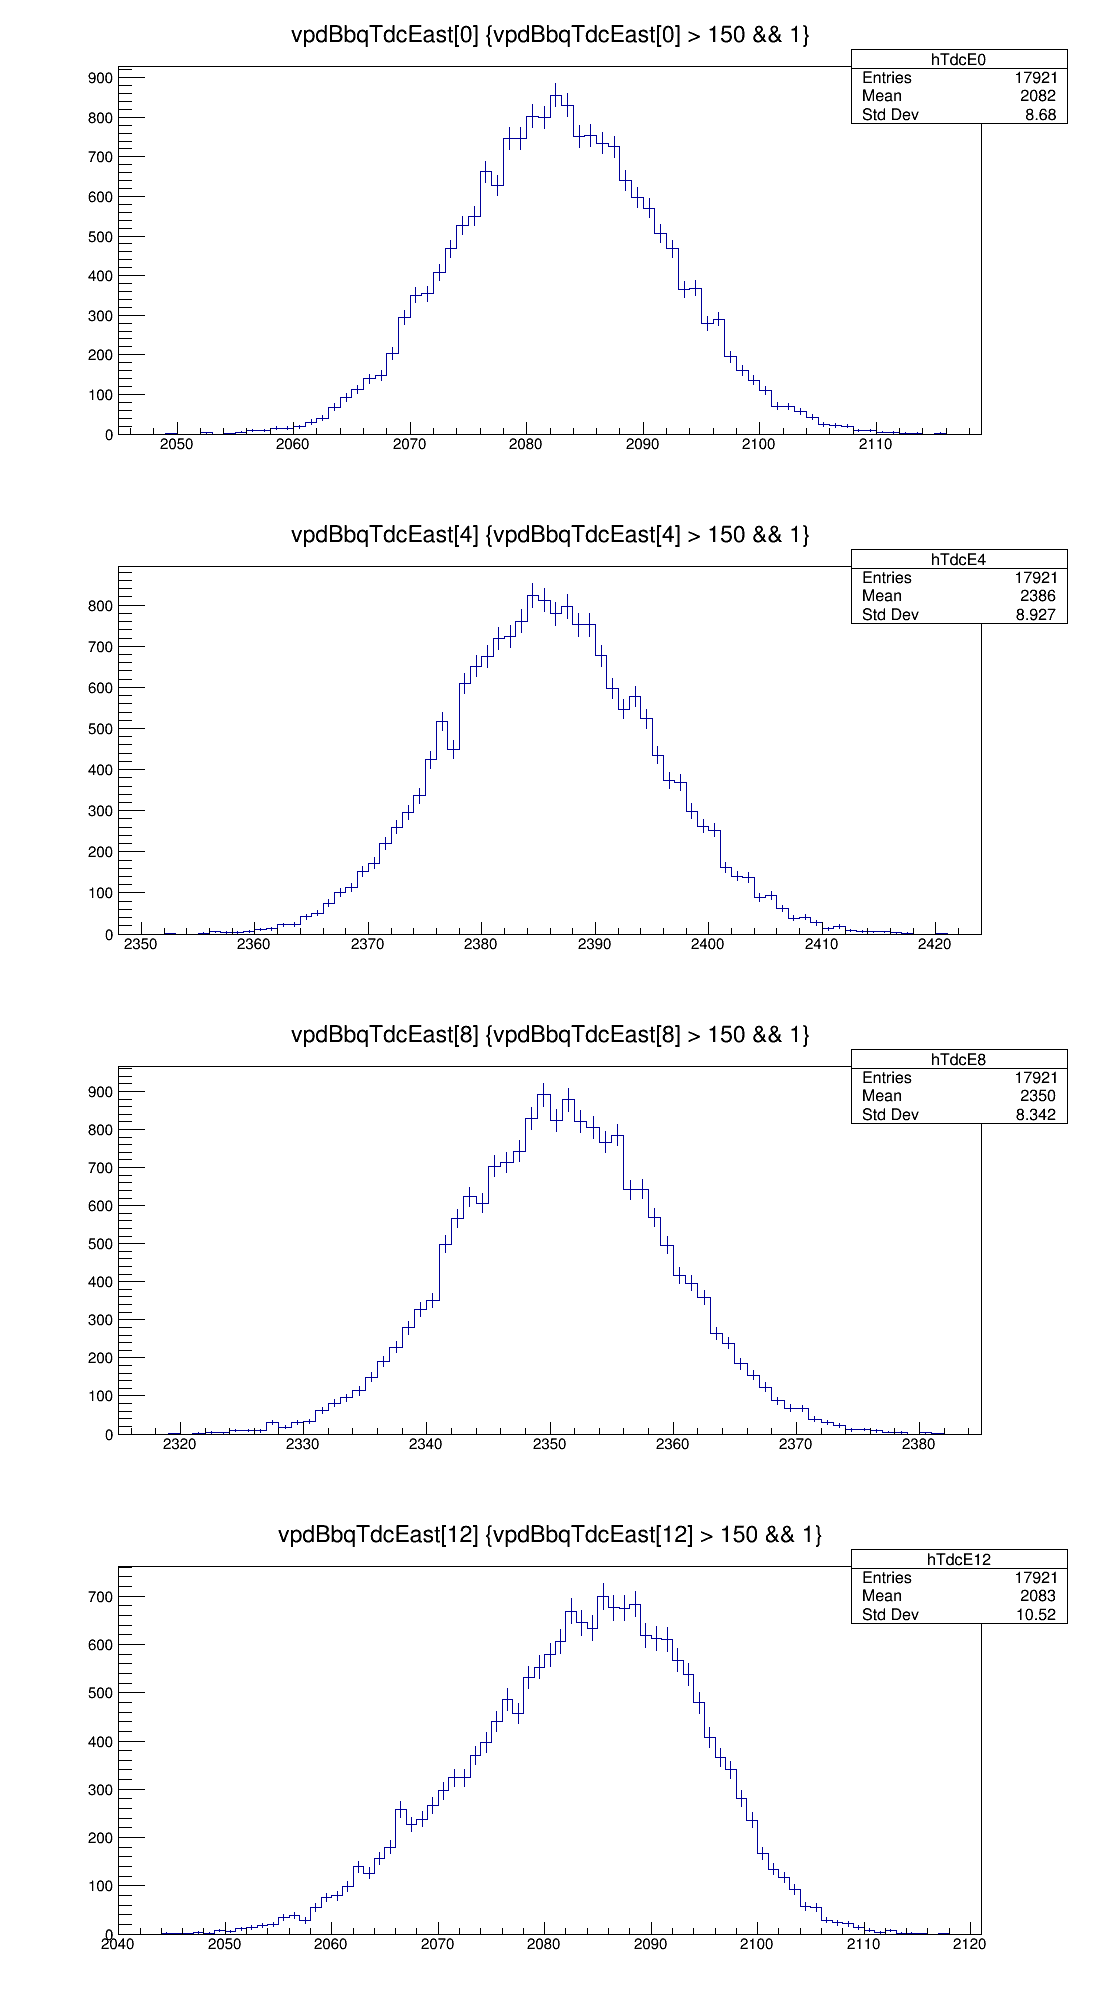

In [9]:
can.Print( "EastPulsers.pdf" )
can

In [10]:
can = Canvas( width=1100, height=2000 )
can.Divide( 1, 4 )
can.cd(1)
chain.Draw( tdcW(0) + ">>hTdcW0", safeW([0]), "h" )
mTdcW0 = int(R.gDirectory.Get( "hTdcW0" ).GetMean())
can.cd(2)
chain.Draw( tdcW(4) + ">>hTdcW4", safeW([4]), "h" )
mTdcW4 = int(R.gDirectory.Get( "hTdcW4" ).GetMean())
can.cd(3)
chain.Draw( tdcW(8) + ">>hTdcW8", safeW([8]), "h" )
mTdcW8 = int(R.gDirectory.Get( "hTdcW8" ).GetMean())
can.cd(4)
chain.Draw( tdcW(12) + ">>hTdcW12", safeW([12]), "h" )
mTdcW12 = int(R.gDirectory.Get( "hTdcW12" ).GetMean())
print "{ ", mTdcW0, ", ", mTdcW4, ", ", mTdcW8, ", ", mTdcW12, " }"

{  2440 ,  2329 ,  2290 ,  2172  }


## West Channel Pulsers

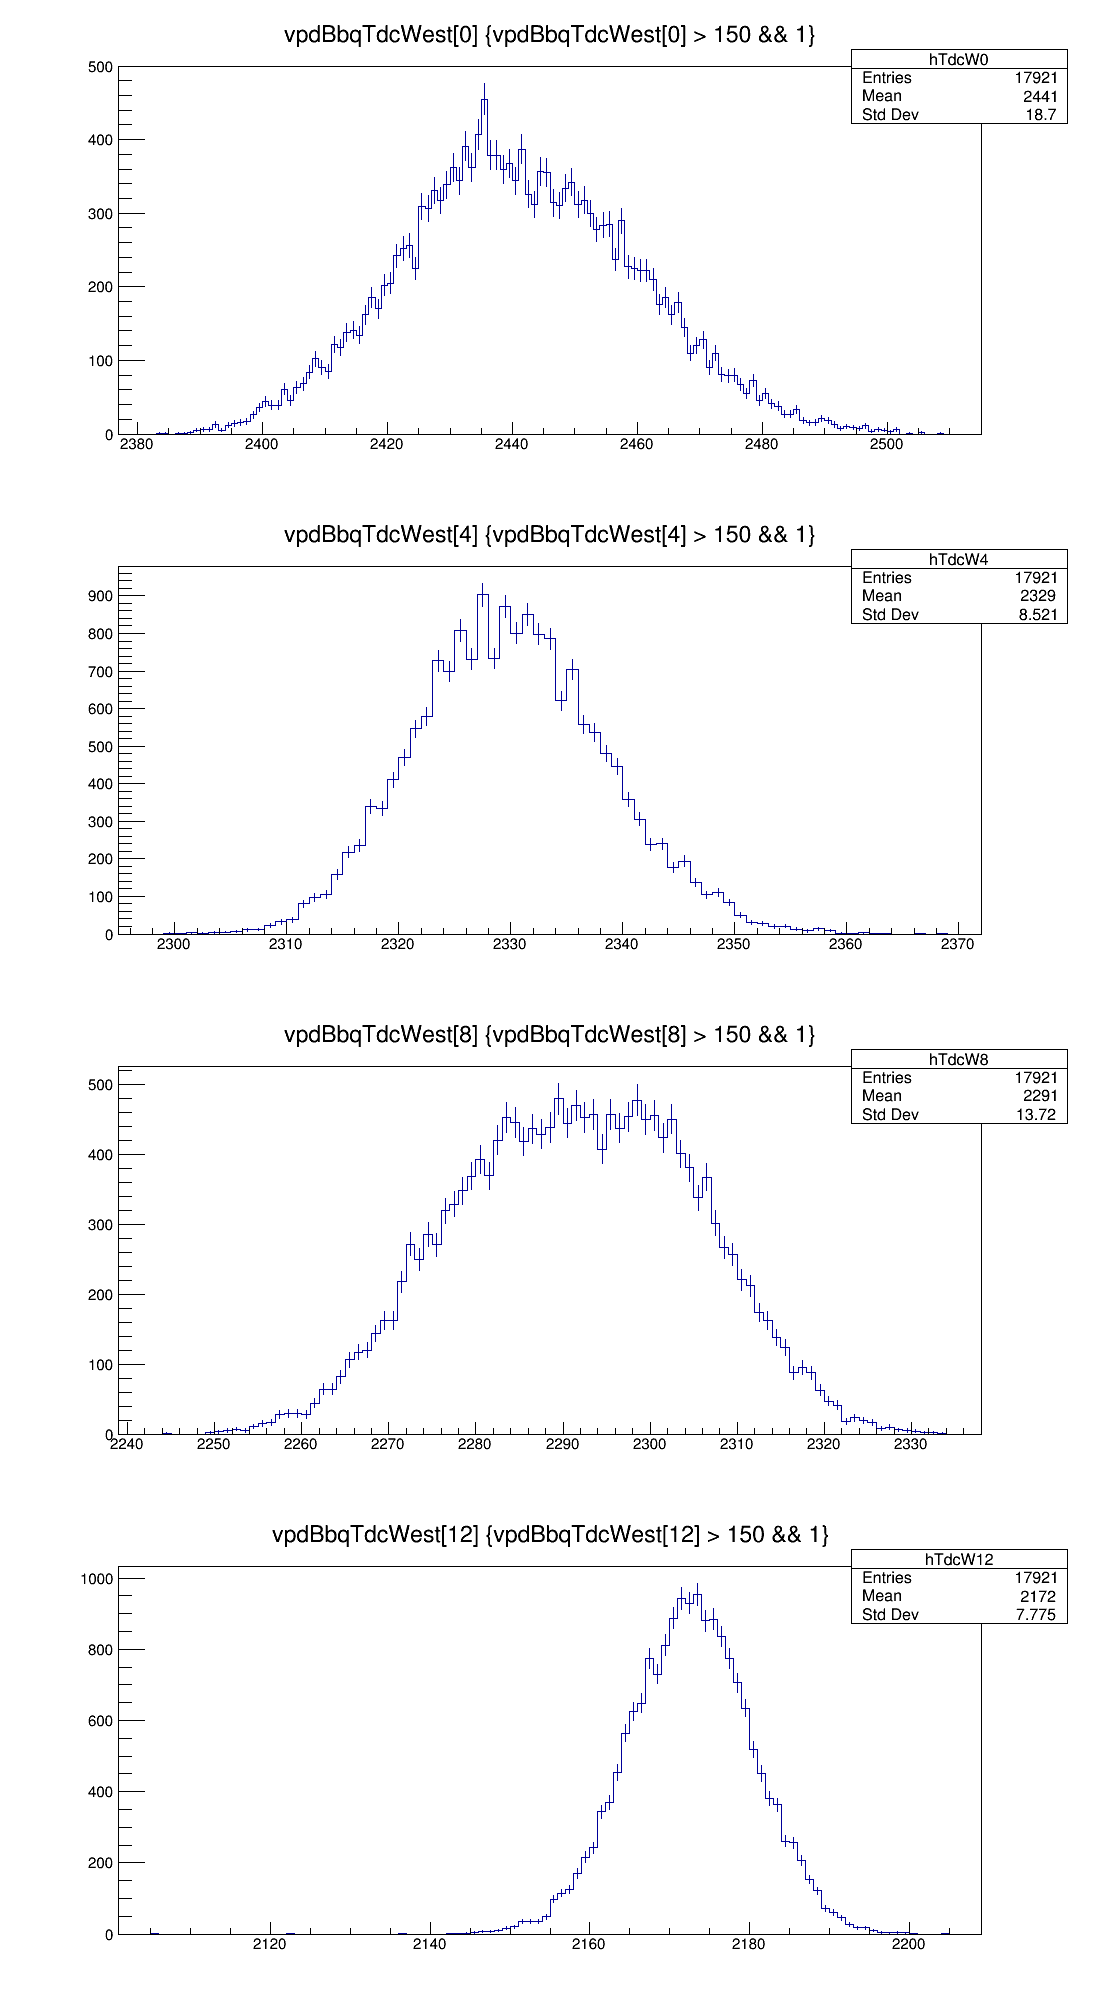

In [11]:
can.Print( "WestPulsers.pdf" )
can

In [60]:
can = Canvas( width=1100, height=1000 )
can.Divide( 1, 2 )

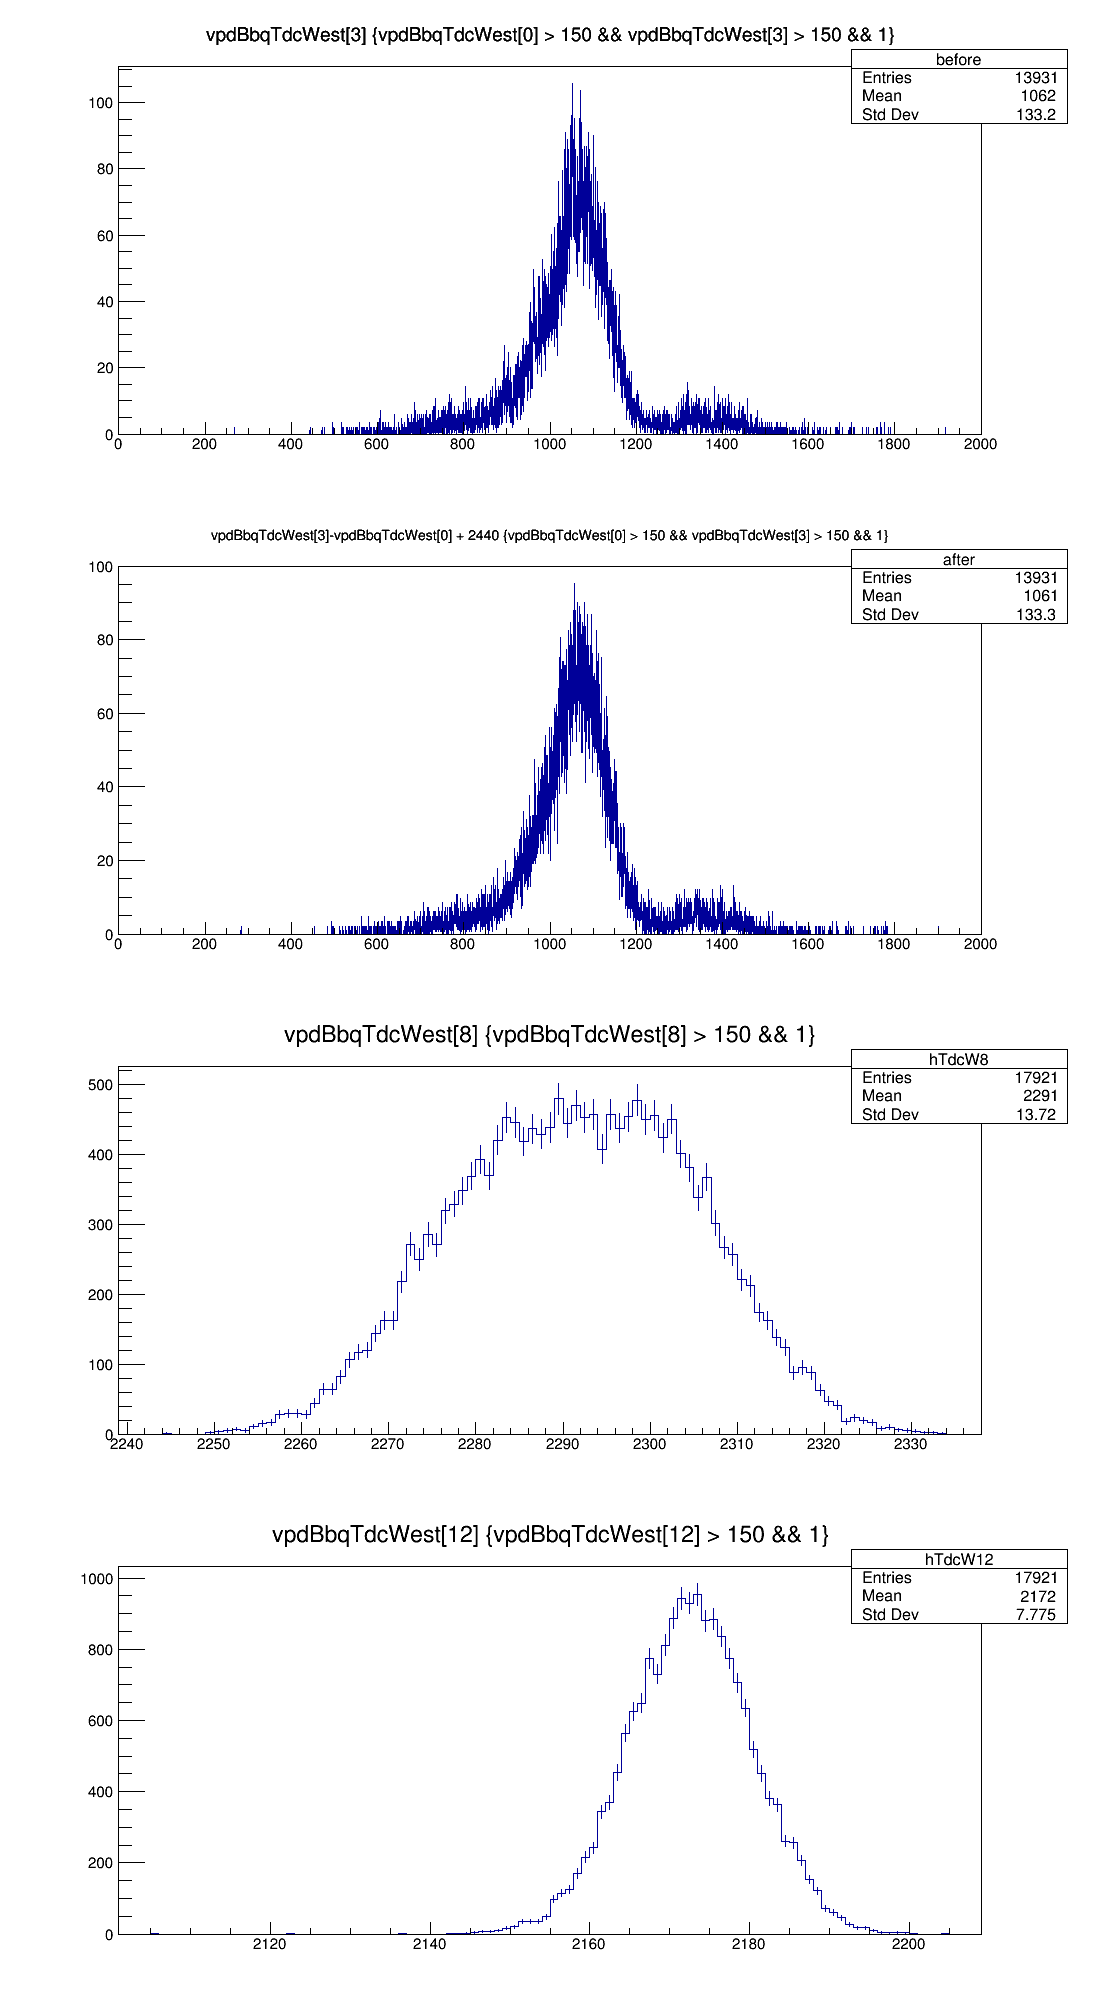

In [70]:
can.cd(1)
chain.Draw( tdcW(3) + ">>before(2000, 0, 2000)", safeW([ 0, 3]), "h" )
can.cd(2)
chain.Draw( tdcW(3) + "-" +  tdcW(0) + " + " + str( mTdcW0 ) +">>after(2000, 0, 2000)" , safeW([0, 3]), "h" )
can


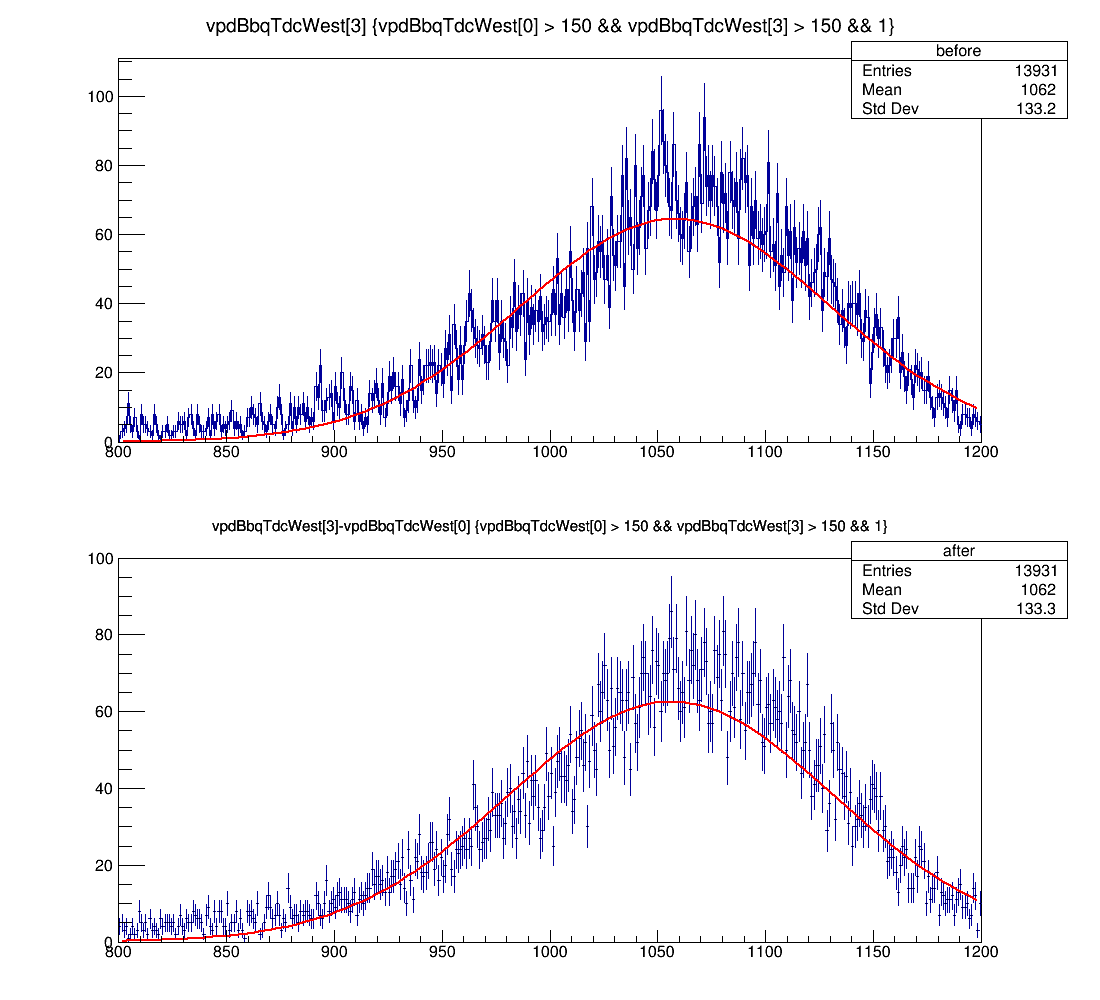

In [64]:
R.gDirectory.Get( "before" ).Fit( "gaus" )
R.gDirectory.Get( "after" ).Fit( "gaus" )
can

In [1]:
(18.7 + 8.5 + 13.7 + 7.7) / 4.0

12.15